In [1]:
def hide_code_in_slideshow():
    import os
    uid = os.urandom(8).hex()
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;

            while (!p.hasClass("cell")) {
                p=p.parent();

                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display_html(html, raw=True)

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>


# Interface detection vs Image superposition

### importing modules

- numpy for numerical programming
- correlate function to perform the cross correlation of signals
- matplotlib for charts
- homemade functions to load and format the images
- IPython methods to display content

In [7]:
import numpy as np
from scipy.signal import correlate
import matplotlib.pyplot as plt
%matplotlib inline
from my_modules.inthei import *
from IPython.display import Image, SVG, display, HTML, IFrame, display_html
gr = '#333333';location = r'\Antigas\Alta\30\253\Imagem '

## Interface detection

In [4]:
gr = '#333333'
pics = np.linspace(1,9e3,9e3)
location = r'\Antigas\Alta\30\253\Imagem '
ROI = (0,792,6,68)
iarray = im_start(pics,path=location,box=ROI)
iarray_b = bg_removal(iarray)
iarray_p = np.array([im_proc(i) for i in iarray_b])
iarray_h = [interface_height(ii,62) for ii in iarray_p]

In [5]:
h1 = np.zeros((iarray_p.shape[0],iarray_p.shape[1]))
for j,ii in enumerate(iarray_p):
    iarray_D, iarray_h = interface_height(ii,62)
    h1[j] = iarray_h

###  Time and space signals

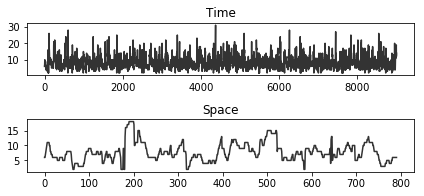

In [6]:
hide_code_in_slideshow()

fig = plt.figure(figsize=(6,4/np.sqrt(2)))
ax1 = fig.add_subplot(211)
ax1.plot(62-h1[:,1],color=gr)
ax1.set_title('Time')
ax2 = fig.add_subplot(212)
ax2.plot(62-h1[1,:],color=gr)
ax2.set_title('Space')
plt.tight_layout()

### Fourier analysis - time signal and its spectrum

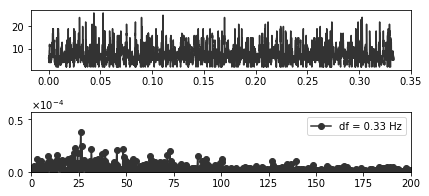

In [7]:
hide_code_in_slideshow()

sig = 62-h1[:,791]
fs = 3000
t = np.linspace(0,1000/fs,len(sig))
Y = np.fft.fft(sig - np.mean(sig),norm='ortho')
Y = 2 * Y / len(Y)
Y[0] = Y[0] / 2
f = np.fft.fftfreq(len(Y),d=1/fs)

fig = plt.figure(figsize=(6,4/np.sqrt(2)))
ax1 = fig.add_subplot(211)
ax1.plot(t,sig,color=gr)
ax2 = fig.add_subplot(212)
ax2.plot(f[0:int(len(Y)/2)],np.abs(Y[0:int(len(Y)/2)])**2,'o-',
        color=gr,label='df = {:.2f} Hz'.format(f[1]-f[0]))
ax2.set_xlim([0, 200])
ax2.set_ylim([0, 1.5*np.max(np.abs(Y[0:int(len(Y)/2)])**2)])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,4))
ax2.yaxis.major.formatter._useMathText = True
ax2.legend(loc='best',numpoints=1,fontsize=10)
plt.tight_layout()

In [8]:
fs = 3000
freq = []
for i,ts in enumerate(h1.T):
    ts_flip = np.mean(ts) - ts
    Y = np.fft.fft(ts_flip,norm='ortho')
    Y = 2 * Y / len(Y)
    Y[0] = Y[0] / 2
    f = np.fft.fftfreq(len(Y),d=1/fs)
    idx = np.argmax(np.abs(Y[0:int(len(Y)/2)])**2)
    freq.append(f[idx])
print('Frequência média: {:.2f} Hz'.format(np.mean(freq)))

Frequência média: 27.70 Hz


## Histograms

### Frequency and velocity

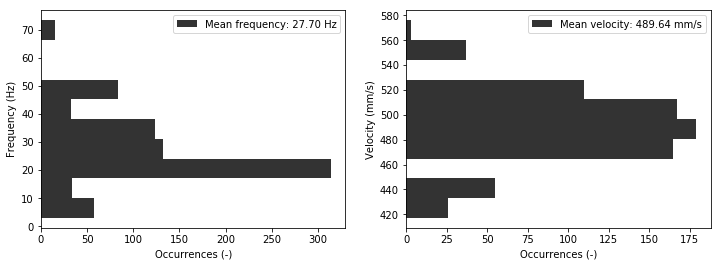

In [9]:
hide_code_in_slideshow()

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.hist(freq,bins=10,orientation='horizontal',
         histtype='bar',color=gr,normed=False,
        label='Mean frequency: {:.2f} Hz'.format(np.mean(freq)))
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('Occurrences (-)')
plt.legend();

b = []
for i in range(np.shape(h1.T)[0]-50):
    b.append(np.argmax(correlate(5*(62-h1.T[i,:9000])/62,
                                 5*(62-h1.T[i+50,:9000])/62,mode='same')))
ax2 = fig.add_subplot(122)
ax2.hist(50 / (np.array(b) - 4500) * 5 / 62 * fs,bins=10,
        orientation='horizontal',color=gr,
        label='Mean velocity: {:.2f} mm/s'.format(np.mean(50 / (np.array(b) - 4500) * (5 / 62) * fs)))
ax2.set_ylabel('Velocity (mm/s)')
ax2.set_xlabel('Occurrences (-)')
plt.legend();

##  Image superposition

In [8]:
ROI = (0,792,54,55)
imgs = np.zeros((1,792),dtype="int32")
for i in np.linspace(1,9000,9000):
    a = imread_x(i,path=location,box=ROI).T
    imgs = np.concatenate((imgs,a))

###  Time and space signals

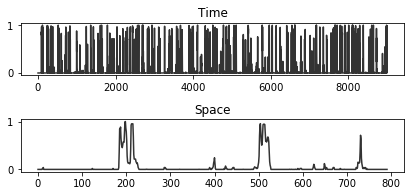

In [11]:
hide_code_in_slideshow()
fig = plt.figure(figsize=(6,4/np.sqrt(2)))
ax1 = fig.add_subplot(211)
ax1.plot(imgs.T[1],color=gr)
ax1.set_title('Time')
ax2 = fig.add_subplot(212)
ax2.plot(imgs.T[:,1],color=gr)
ax2.set_title('Space')
plt.tight_layout()

### Fourier analysis - time signal and its spectrum

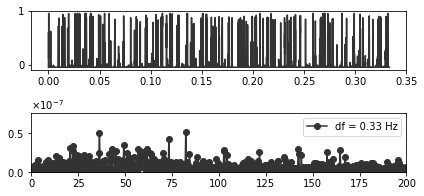

In [10]:
hide_code_in_slideshow()
sig = imgs.T[500] - np.mean(imgs.T[500])
fs = 3000
t = np.linspace(0,1000/fs,len(sig))
Y = np.fft.fft(sig,norm='ortho')
Y = 2 * Y / len(Y)
Y[0] = Y[0] / 2
f = np.fft.fftfreq(len(Y),d=1/fs)
fig = plt.figure(figsize=(6,4/np.sqrt(2)))
ax1 = fig.add_subplot(211)
ax1.plot(t,sig,color=gr)
ax2 = fig.add_subplot(212)
ax2.plot(f[0:int(len(Y)/2)],np.abs(Y[0:int(len(Y)/2)])**2,'o-',
        color=gr,label='df = {:.2f} Hz'.format(f[1]-f[0]))
ax2.set_xlim([0, 200])
ax2.set_ylim([0, 1.5*np.max(np.abs(Y[0:int(len(Y)/2)])**2)])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,4))
ax2.yaxis.major.formatter._useMathText = True
ax2.legend(loc='best',numpoints=1,fontsize=10)
plt.tight_layout()

In [11]:
freq = []
for i,ts in enumerate(imgs.T):
    ts_flip = ts - np.mean(ts)
    Y = np.fft.fft(ts_flip,norm='ortho')
    Y = 2 * Y / len(Y)
    Y[0] = Y[0] / 2
    f = np.fft.fftfreq(len(Y),d=1/fs)
    idx = np.argmax(np.abs(Y[0:int(len(Y)/2)])**2)
    freq.append(f[idx])
print('Frequência média: {:.2f} Hz'.format(np.mean(freq)))

Frequência média: 41.80 Hz


### Histogram

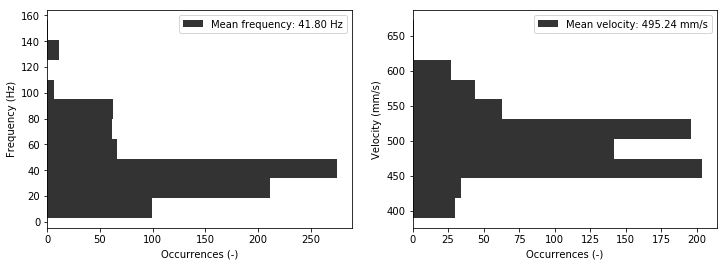

In [12]:
hide_code_in_slideshow()

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.hist(freq,bins=10,orientation='horizontal',
         histtype='bar',color=gr,normed=False,
        label='Mean frequency: {:.2f} Hz'.format(np.mean(freq)))
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('Occurrences (-)')
plt.legend();

b = []
for i in range(np.shape(imgs.T)[0]-50):
    b.append(np.argmax(np.correlate(imgs.T[i][:9000],imgs.T[i+50][:9000],mode='same')))

ax2 = fig.add_subplot(122)
ax2.hist(50 / (np.array(b) - 4500) * 5 / 62 * fs,
        orientation='horizontal',color=gr,
        label='Mean velocity: {:.2f} mm/s'.format(np.mean(50 / (np.array(b) - 4500) * (5 / 62) * fs)))
ax2.set_ylabel('Velocity (mm/s)')
ax2.set_xlabel('Occurrences (-)')
plt.legend();